In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
denver_df = pd.read_csv('../Data/Clean/denver.csv')

In [3]:
denver_df.head()


,DATE,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
0,2018-01,74.0,34.0,28.0,16733.849533,0.133225,537706.730205,682.0,3169.0,397708.149372,3.482,4.033,0.550
1,2018-02,72.0,31.0,22.0,16423.930620,0.130210,545468.537291,657.0,3395.0,400872.926042,3.785,4.330,0.545
2,2018-03,71.0,30.0,19.0,16012.326935,0.153830,549485.507056,992.0,4766.0,403904.017509,3.910,4.444,0.534
3,2018-04,70.0,31.0,16.0,16674.160324,0.178077,555329.230501,859.0,5045.0,406571.265108,3.925,4.468,0.543
4,2018-05,68.0,32.0,17.0,15617.310131,0.220831,543572.326351,907.0,5812.0,409135.348940,4.066,4.586,0.520


In [4]:
# Check for missing values 
print(denver_df.isnull().sum())

DATE                         0
MarketTempIdx                0
DaysToClose                  0
DaysOnZillow                 0
ListingPriceCutAmt           0
ListingPriceCutPct           0
NewConstructMeanSalePrice    0
NewConstructSalesCount       0
SalesCount                   0
SalePrice                    0
MORTGAGE15US                 0
MORTGAGE30US                 0
RATE_DIFFERENCE              0
dtype: int64


In [5]:
denver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DATE                       78 non-null     object 
 1   MarketTempIdx              78 non-null     float64
 2   DaysToClose                78 non-null     float64
 3   DaysOnZillow               78 non-null     float64
 4   ListingPriceCutAmt         78 non-null     float64
 5   ListingPriceCutPct         78 non-null     float64
 6   NewConstructMeanSalePrice  78 non-null     float64
 7   NewConstructSalesCount     78 non-null     float64
 8   SalesCount                 78 non-null     float64
 9   SalePrice                  78 non-null     float64
 10  MORTGAGE15US               78 non-null     float64
 11  MORTGAGE30US               78 non-null     float64
 12  RATE_DIFFERENCE            78 non-null     float64
dtypes: float64(12), object(1)
memory usage: 8.1+ KB


In [6]:
# Check the shape of denver DataFrame (rows, columns)
print(denver_df.shape)

(78, 13)


In [7]:
# Round the specified columns to 0 decimals
denver_df['ListingPriceCutAmt'] = denver_df['ListingPriceCutAmt'].round(0)
denver_df['NewConstructMeanSalePrice'] = denver_df['NewConstructMeanSalePrice'].round(0)
denver_df['SalePrice'] = denver_df['SalePrice'].round(0)
denver_df.head()

,DATE,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
0,2018-01,74.0,34.0,28.0,16734.0,0.133225,537707.0,682.0,3169.0,397708.0,3.482,4.033,0.550
1,2018-02,72.0,31.0,22.0,16424.0,0.130210,545469.0,657.0,3395.0,400873.0,3.785,4.330,0.545
2,2018-03,71.0,30.0,19.0,16012.0,0.153830,549486.0,992.0,4766.0,403904.0,3.910,4.444,0.534
3,2018-04,70.0,31.0,16.0,16674.0,0.178077,555329.0,859.0,5045.0,406571.0,3.925,4.468,0.543
4,2018-05,68.0,32.0,17.0,15617.0,0.220831,543572.0,907.0,5812.0,409135.0,4.066,4.586,0.520


In [8]:
#Linear Regression for denver
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
#Split denver Data into training and test set
X = denver_df[['DaysToClose', 'DaysOnZillow', 'ListingPriceCutAmt', 'ListingPriceCutPct', 'NewConstructMeanSalePrice', 'NewConstructSalesCount', 'SalesCount', 'MORTGAGE15US', 'MORTGAGE30US', 'RATE_DIFFERENCE']]
y = denver_df['SalePrice']

In [10]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize the Linear Regression model
model = LinearRegression()

In [12]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Evaluate the model
y_pred = model.predict(X_test)

In [14]:
y_pred

array([455490.88875669, 426440.41393486, 459366.43935635, 430181.97230611,
       438968.95444927, 583316.06655552, 423560.28126365, 390284.05650421,
       563767.33501067, 579857.68985993, 630701.74649624, 433020.34839054,
       639278.28538336, 577083.81847582, 434302.56103043, 520682.14231926])

In [15]:
#y_pred_rounded = np.round(y_pred,0)

In [16]:
# Calculate evaluation metrics
linear_mse = mean_squared_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {linear_mse}")
print(f"R-Squared Score: {linear_r2}")

Mean Squared Error: 603730802.29966
R-Squared Score: 0.9003735812798344


In [17]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [18]:
rf_model = RandomForestRegressor()

In [19]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [20]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
rf_y_pred = rf_model.predict(X_test)

In [22]:
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared Score: {rf_r2}")

Mean Squared Error: 603730802.29966
R-squared Score: 0.9003735812798344


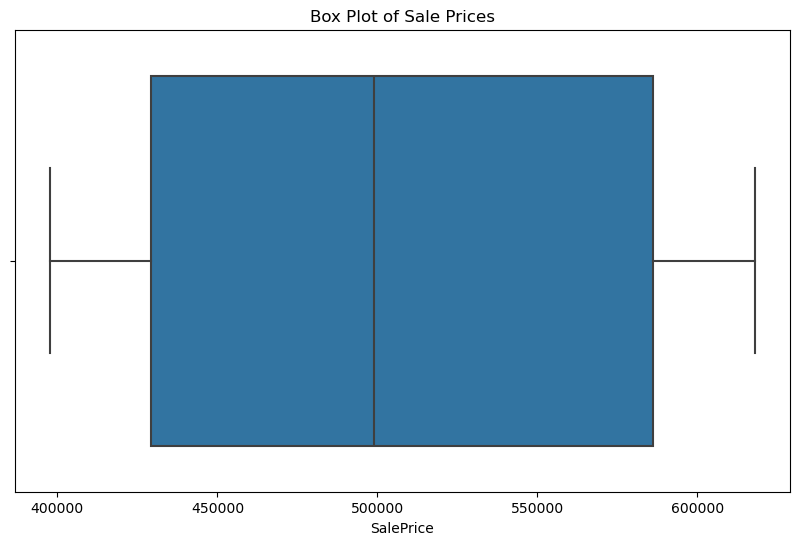

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'SalePrice' is your target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=denver_df['SalePrice'])
plt.title('Box Plot of Sale Prices')
plt.show()

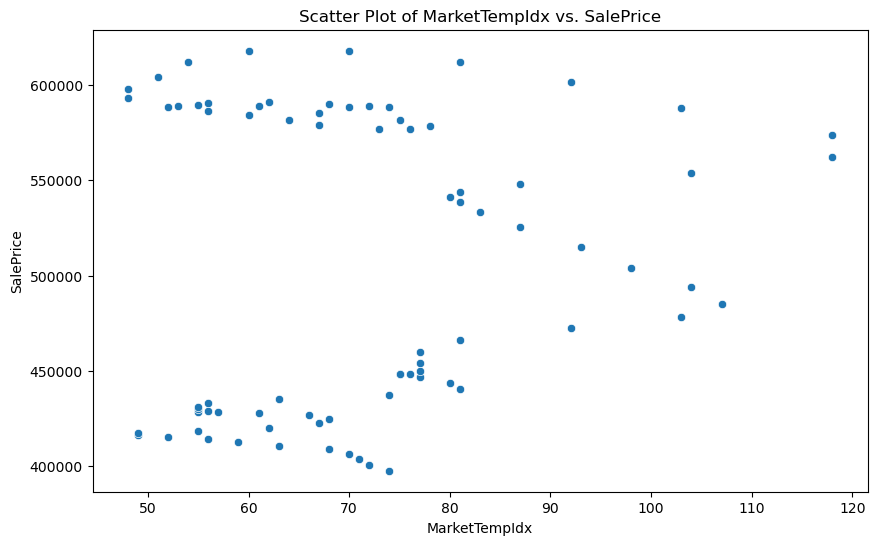

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=denver_df['MarketTempIdx'], y=denver_df['SalePrice'])
plt.title('Scatter Plot of MarketTempIdx vs. SalePrice')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


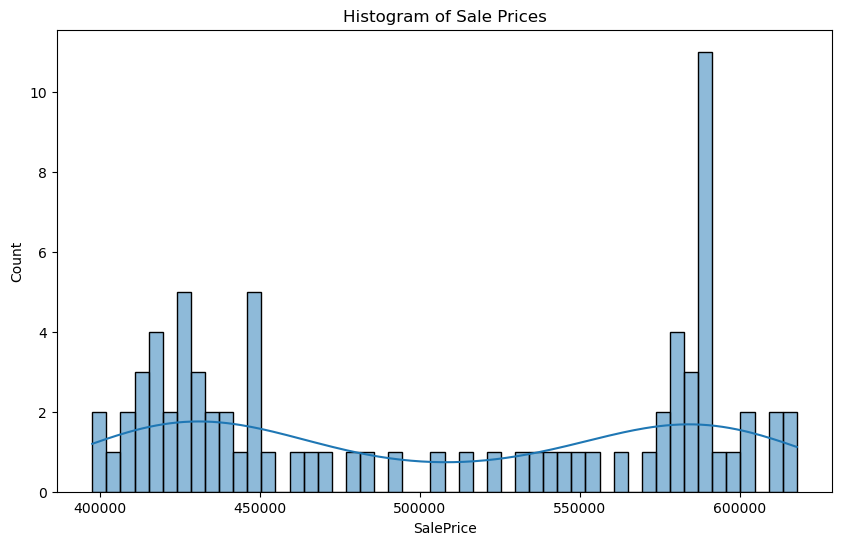

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(denver_df['SalePrice'], bins=50, kde=True)
plt.title('Histogram of Sale Prices')
plt.show()